In [1]:
import pandas
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from scipy import stats
import numpy

In [2]:
df = pandas.read_csv("datos/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df = df.dropna()

In [5]:
df.shape

(20433, 10)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Text(0.5, 1.0, 'Distribution Median House Values')

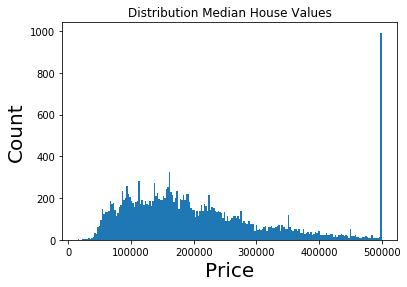

In [7]:
pyplot.hist(df["median_house_value"], bins = 200)
pyplot.xlabel("Price", fontsize=20)
pyplot.ylabel("Count", fontsize=20)
pyplot.title("Distribution Median House Values")

In [8]:
df.corr()["median_house_value"].sort_values()

latitude             -0.144638
longitude            -0.045398
population           -0.025300
total_bedrooms        0.049686
households            0.064894
housing_median_age    0.106432
total_rooms           0.133294
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [9]:
# One hot encode the variables
dummy_df = pandas.get_dummies(df["ocean_proximity"])

# Put the grade back in the dataframe
dummy_df['median_house_value'] = df['median_house_value']

# Find correlations with grade
dummy_df.corr()['median_house_value'].sort_values()

INLAND               -0.484787
ISLAND                0.023525
NEAR OCEAN            0.140378
NEAR BAY              0.160526
<1H OCEAN             0.257614
median_house_value    1.000000
Name: median_house_value, dtype: float64

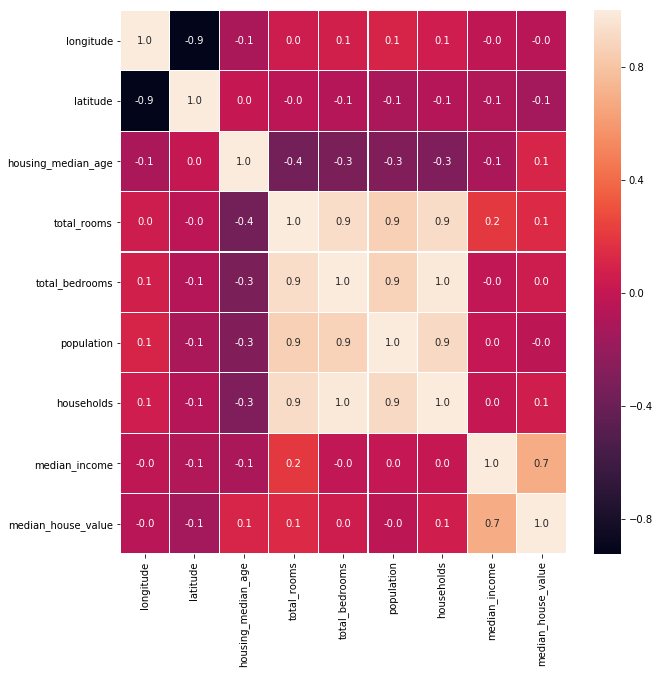

In [10]:
f, ax = pyplot.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, linewidth = 0.3, fmt = ".1f", ax = ax)
pyplot.show()

In [11]:
def format_data(df):
    # Targets are final grade of student
    labels = df['median_house_value']

    # One-Hot Encoding of Categorical Variables
    df = pandas.get_dummies(df)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['median_house_value'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:]
    
    df = df.loc[:, most_correlated.index]
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,median_house_value,median_income,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,latitude,ocean_proximity_NEAR OCEAN,total_rooms,housing_median_age,households,total_bedrooms,longitude,population,ocean_proximity_ISLAND
2830,44600.0,1.7109,1,0,0,35.40,0,8739.0,11.0,1919.0,2190.0,-119.01,4781.0,0
14951,155000.0,2.4567,0,1,0,32.71,0,2413.0,18.0,551.0,533.0,-116.96,1129.0,0
8314,450000.0,2.1579,0,0,0,33.35,0,1675.0,27.0,331.0,521.0,-118.32,744.0,1
14271,65700.0,1.0531,0,0,0,32.70,1,818.0,38.0,231.0,217.0,-117.12,953.0,0
305,91200.0,1.8913,0,0,1,37.76,0,2018.0,43.0,367.0,408.0,-122.18,1111.0,0


In [13]:
print(X_train.shape)
print(X_test.shape)

(15324, 14)
(5109, 14)


In [14]:
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', "Bayesian Ridge"]
    
    X_train = X_train.drop(columns='median_house_value')
    X_test = X_test.drop(columns='median_house_value')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = BayesianRidge(compute_score=True)
    
    # Dataframe for results
    results = pandas.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        coeff = model.coef_
        score = model.score(X_test, y_test)
        
        print("{} Coefficients: ".format(model_name_list[i]), coeff)
        print("\n")
        print("{} Score: ".format(model_name_list[i]), score)
        print("\n")
        # Metrics
        mae = numpy.mean(abs(predictions - y_test))
        rmse = numpy.sqrt(numpy.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = numpy.mean(y_train)
    baseline_mae = numpy.mean(abs(baseline - y_test))
    baseline_rmse = numpy.sqrt(numpy.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results


In [15]:
results = evaluate(X_train, X_test, y_train, y_test)

Linear Regression Coefficients:  [ 3.92330777e+04 -7.36819088e+04 -3.40321348e+04 -4.02817945e+04
 -2.55205753e+04 -3.12916376e+04 -6.36691750e+00  1.08813173e+03
  4.35107705e+01  1.02597469e+02 -2.68384898e+04 -3.62122333e+01
  1.79287476e+05]


Linear Regression Score:  0.6547516410329023


Bayesian Ridge Coefficients:  [ 3.92244863e+04 -5.00655360e+04 -1.05743626e+04 -1.67689497e+04
 -2.56126711e+04 -7.85132337e+03 -6.36482591e+00  1.09028421e+03
  4.30517739e+01  1.03031260e+02 -2.69134708e+04 -3.62257024e+01
  8.52601716e+04]


Bayesian Ridge Score:  0.6553914482946943




In [16]:
print(results)

                       mae     rmse
Linear Regression  49958.5  68343.3
Bayesian Ridge     49921.4  68279.9
Baseline           92461.7   116314


In [17]:
X_test.iloc[50]

median_house_value            177500.0000
median_income                      2.4827
ocean_proximity_INLAND             0.0000
ocean_proximity_<1H OCEAN          1.0000
ocean_proximity_NEAR BAY           0.0000
latitude                          38.3600
ocean_proximity_NEAR OCEAN         0.0000
total_rooms                     5496.0000
housing_median_age                 6.0000
households                      1189.0000
total_bedrooms                  1374.0000
longitude                       -122.6900
population                      2502.0000
ocean_proximity_ISLAND             0.0000
Name: 19157, dtype: float64

In [18]:
model1 = LinearRegression()
model2 = BayesianRidge(compute_score=True)

# Train and predict with each model
for i, model in enumerate([model1, model2]):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(predictions[50])

177499.99999999997
177500.00000951337


# Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score
import sklearn

In [20]:
sklearn.metrics.SCORERS.keys()

dict_keys(['normalized_mutual_info_score', 'f1_macro', 'f1_weighted', 'recall', 'neg_median_absolute_error', 'recall_micro', 'neg_log_loss', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'f1_samples', 'completeness_score', 'average_precision', 'homogeneity_score', 'fowlkes_mallows_score', 'r2', 'explained_variance', 'precision_samples', 'recall_macro', 'recall_weighted', 'balanced_accuracy', 'mutual_info_score', 'precision_weighted', 'neg_mean_squared_log_error', 'f1', 'f1_micro', 'accuracy', 'precision', 'precision_macro', 'brier_score_loss', 'adjusted_rand_score', 'recall_samples', 'roc_auc', 'adjusted_mutual_info_score', 'precision_micro', 'v_measure_score'])

In [21]:
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=3)

In [22]:
# find root mean squared error, scores is an array of negative numbers
rmse_scores = numpy.sqrt(-scores)
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  6.051678197755473e-11 
Standard Deviation: 4.543789459150014e-11


In [23]:
bayesian_ridge = BayesianRidge()
scores_bayesian = cross_val_score(bayesian_ridge, X_train, y_train,
                        scoring="neg_mean_absolute_error", cv=10)

In [24]:
rmse_scores_bayesian = numpy.sqrt(-scores_bayesian)
print("Mean:\t\t ", rmse_scores_bayesian.mean(), "\nStandard Deviation:", rmse_scores_bayesian.std())

Mean:		  0.00024122816112414087 
Standard Deviation: 0.0002025408762082677
